### Problem Statement

Patients who suffering from heart disease they are need to have a Heart detection system for quick response of who has a heart disease or not before it's too late

#### Steps Followed 
1. Collecting the data (Kaggle)
2. Data Preprocessing
3. Exploratory Data Analysis
4. Feature Engineering
5. Feature Selection
6. Model Building
7. Model Evaluation
8. Predictions
9. Model Deployment

#### Brief overview
In this Project we are going to apply the various techniques to get insights of the data for better understanding about the data. Heart Detection system is must for every one for a quick response who has a heart disease or not with a short time. In this section you can find out how each feature or attributes are impacted on the target variable i.e., Heart Disease

### Content
#### Attribute information

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

#### Import the Libraries

In [1]:
#manipulation
import pandas as pd
#working with an arrays
import numpy as np
#visualization
import matplotlib.pyplot as plt
%matplotlib inline
#hgih level visulaization for better graphs
import seaborn as sns
#For visualizing all the columns in the table
pd.pandas.set_option('display.max_columns',None)

#### Data Loading

In [2]:
data=pd.read_csv(r"C:\Users\Praneeth\Downloads\archive\heart.csv")

In [3]:
#load the data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#last few rows of the data
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#get the size of the data
data.shape

(303, 14)

In [6]:
#Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#describe the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
#Check data type for each variable
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
#Check any null values are present in the data
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### EDA

<function matplotlib.pyplot.show(*args, **kw)>

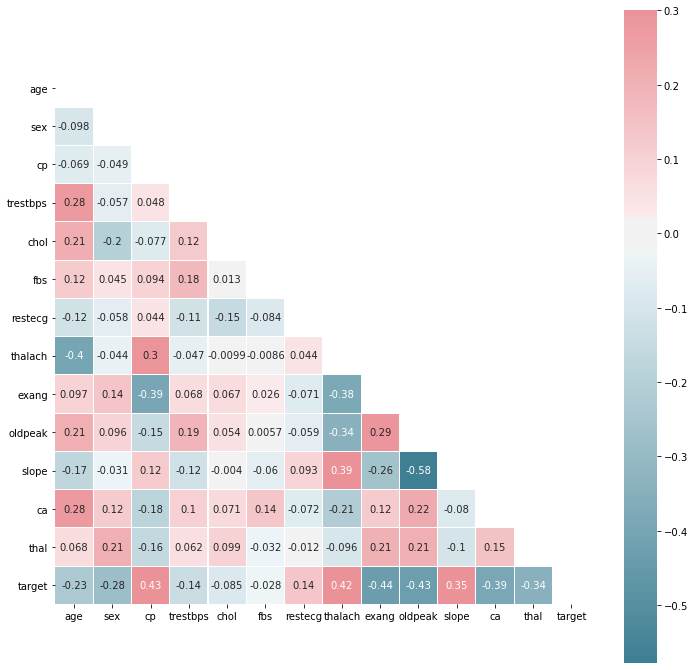

In [10]:
#Check correlation with heatmap
cmap=sns.diverging_palette(220,10, as_cmap=True)
plt.figure(figsize=(12,12))

corr=data.corr()

mask=np.triu(np.ones_like(corr,dtype=bool))

sns.heatmap(corr,annot=True,cmap=cmap,mask=mask,vmax=0.3,square=True,center=0,linewidths=0.05)
plt.show

Not have a Disease: 138
Have a Disease: 165


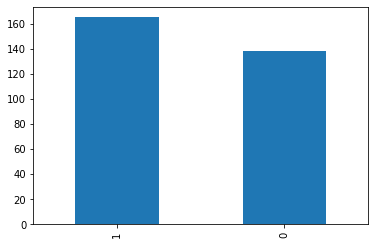

In [11]:
#Check data is balanced or not
data['target'].value_counts().plot.bar()
print('Not have a Disease: {}'.format(len(data[data['target']==0])))
print('Have a Disease: {}'.format(len(data[data['target']==1])))

From the above graph we can clearly see that the data is balanced

In [12]:
class Dataframe():
    def __init__(self):
        print('DataFrame object is Created')
        
    def Attribte_info(self,df):
        
        data_info=pd.DataFrame(columns=['No of Observations',
                               'No of variables',
                              'No of Numerical variables',
                              'No of Categorical variables',
                              'No of Factor variables',
                              'No of zero variance variables',
                              'No of date variables',
                              'No of Logical variables'])
        
        data_info.loc[0,'No of Observations']=data.shape[0]
        data_info.loc[0,'No of variables']=data.shape[1]
        data_info.loc[0,'No of Numerical variables']=data._get_numeric_data().shape[1]
        data_info.loc[0,'No of Categorical variables']=data.select_dtypes(include='object').shape[1]
        data_info.loc[0,'No of Factor variables']=data.select_dtypes(include='category').shape[1]
        data_info.loc[0,'No of zero variance variables']=data.loc[:,data.apply(pd.Series.nunique)==1].shape[1]
        data_info.loc[0,'No of date variables']=data.select_dtypes(include='datetime64').shape[1]
        data_info.loc[0,'No of Logical variables']=data.select_dtypes(include='bool').shape[1]
        
        data_info=data_info.transpose()
        data_info.columns=['Value']
        
        
        return data_info
    
    
    def _iqr(self,x):
        """
        It is a private method return you a interquartile range
        """
            
        return x.quantile(q=0.75)-x.quantile(q=0.25)
        
    def __outlier_count(self,x):
        """
        It is a private method which return you a outliers present in a interquartile range
        """
        upper_out=x.quantile(q=0.75)+1.5 * self._iqr(x)
        lower_out=x.quantile(q=0.25)-1.5 * self._iqr(x)
            
        return len(x[x > upper_out])+len(x[x < lower_out])
    def num_count_summary(self,df):
        """
        This method which returns you basci information about Numerica variable like Positive values,Negitive Vlues,Unique Count,Zero count positive and negitive,infiniyt-count and count of outliers
        """
            
        df_num=df._get_numeric_data()
        data_info_num=pd.DataFrame()
        i=0
        for c in df_num.columns:
            data_info_num.loc[c,'Negitive values']=df_num[df_num[c] < 0].shape[0]
            data_info_num.loc[c,'Positive values']=df_num[df_num[c] > 0].shape[0]
            data_info_num.loc[c,'Zero values']=df_num[df_num[c]== 0].shape[0]
            data_info_num.loc[c,'Unique_count']=len(df_num[c].unique())
            data_info_num.loc[c,'Negitive_infinity_count']=df_num[df_num[c]== -np.inf].shape[0]
            data_info_num.loc[c,'Positive_infinity_count']=df_num[df_num[c]== np.inf].shape[0]
            data_info_num.loc[c,'Percentage of miisning values']=df_num[df_num[c].isnull()].shape[0]/df_num.shape[0]
            data_info_num.loc[c,'Count of outliers']=self.__outlier_count(df_num[c])
            i= i+1
        return data_info_num
    def statstical_summary(self,df):
        """
        This method which return you a various percentile of the data including count and mean
        """
        df_num=df._get_numeric_data()
        data_stat_num=pd.DataFrame()
            
        try:
            data_stat_num=pd.concat([df_num.describe().transpose(),
                                        pd.DataFrame(df_num.quantile(q=0.1)),
                                        pd.DataFrame(df_num.quantile(q=0.90)),
                                        pd.DataFrame(df_num.quantile(q=0.95))],axis=1)
            data_stat_num.columns=['count','mean','std','min','25%','50%','75%','max','10%','90%','95%']
        except:
            pass
        return data_stat_num
    

In [13]:
d1=Dataframe()

DataFrame object is Created


In [14]:
d1.Attribte_info(data)

,Value
No of Observations,303
No of variables,14
No of Numerical variables,14
No of Categorical variables,0
No of Factor variables,0
No of zero variance variables,0
No of date variables,0
No of Logical variables,0


In [15]:
d1.num_count_summary(data)

,Negitive values,Positive values,Zero values,Unique_count,Negitive_infinity_count,Positive_infinity_count,Percentage of miisning values,Count of outliers
age,0.0,303.0,0.0,41.0,0.0,0.0,0.0,0.0
sex,0.0,207.0,96.0,2.0,0.0,0.0,0.0,0.0
cp,0.0,160.0,143.0,4.0,0.0,0.0,0.0,0.0
trestbps,0.0,303.0,0.0,49.0,0.0,0.0,0.0,9.0
chol,0.0,303.0,0.0,152.0,0.0,0.0,0.0,5.0
fbs,0.0,45.0,258.0,2.0,0.0,0.0,0.0,45.0
restecg,0.0,156.0,147.0,3.0,0.0,0.0,0.0,0.0
thalach,0.0,303.0,0.0,91.0,0.0,0.0,0.0,1.0
exang,0.0,99.0,204.0,2.0,0.0,0.0,0.0,0.0
oldpeak,0.0,204.0,99.0,40.0,0.0,0.0,0.0,5.0


In [16]:
d1.statstical_summary(data)

,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0,42.0,66.0,68.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0,0.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0,110.0,152.0,160.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0,188.0,308.8,326.9
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0,116.0,176.6,181.9
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2,0.0,2.8,3.4


C:\Users\Praneeth\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Praneeth\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Praneeth\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Praneeth\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Praneeth\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Praneeth\anaconda3\lib\site-packages\seaborn\distributions.py:369:

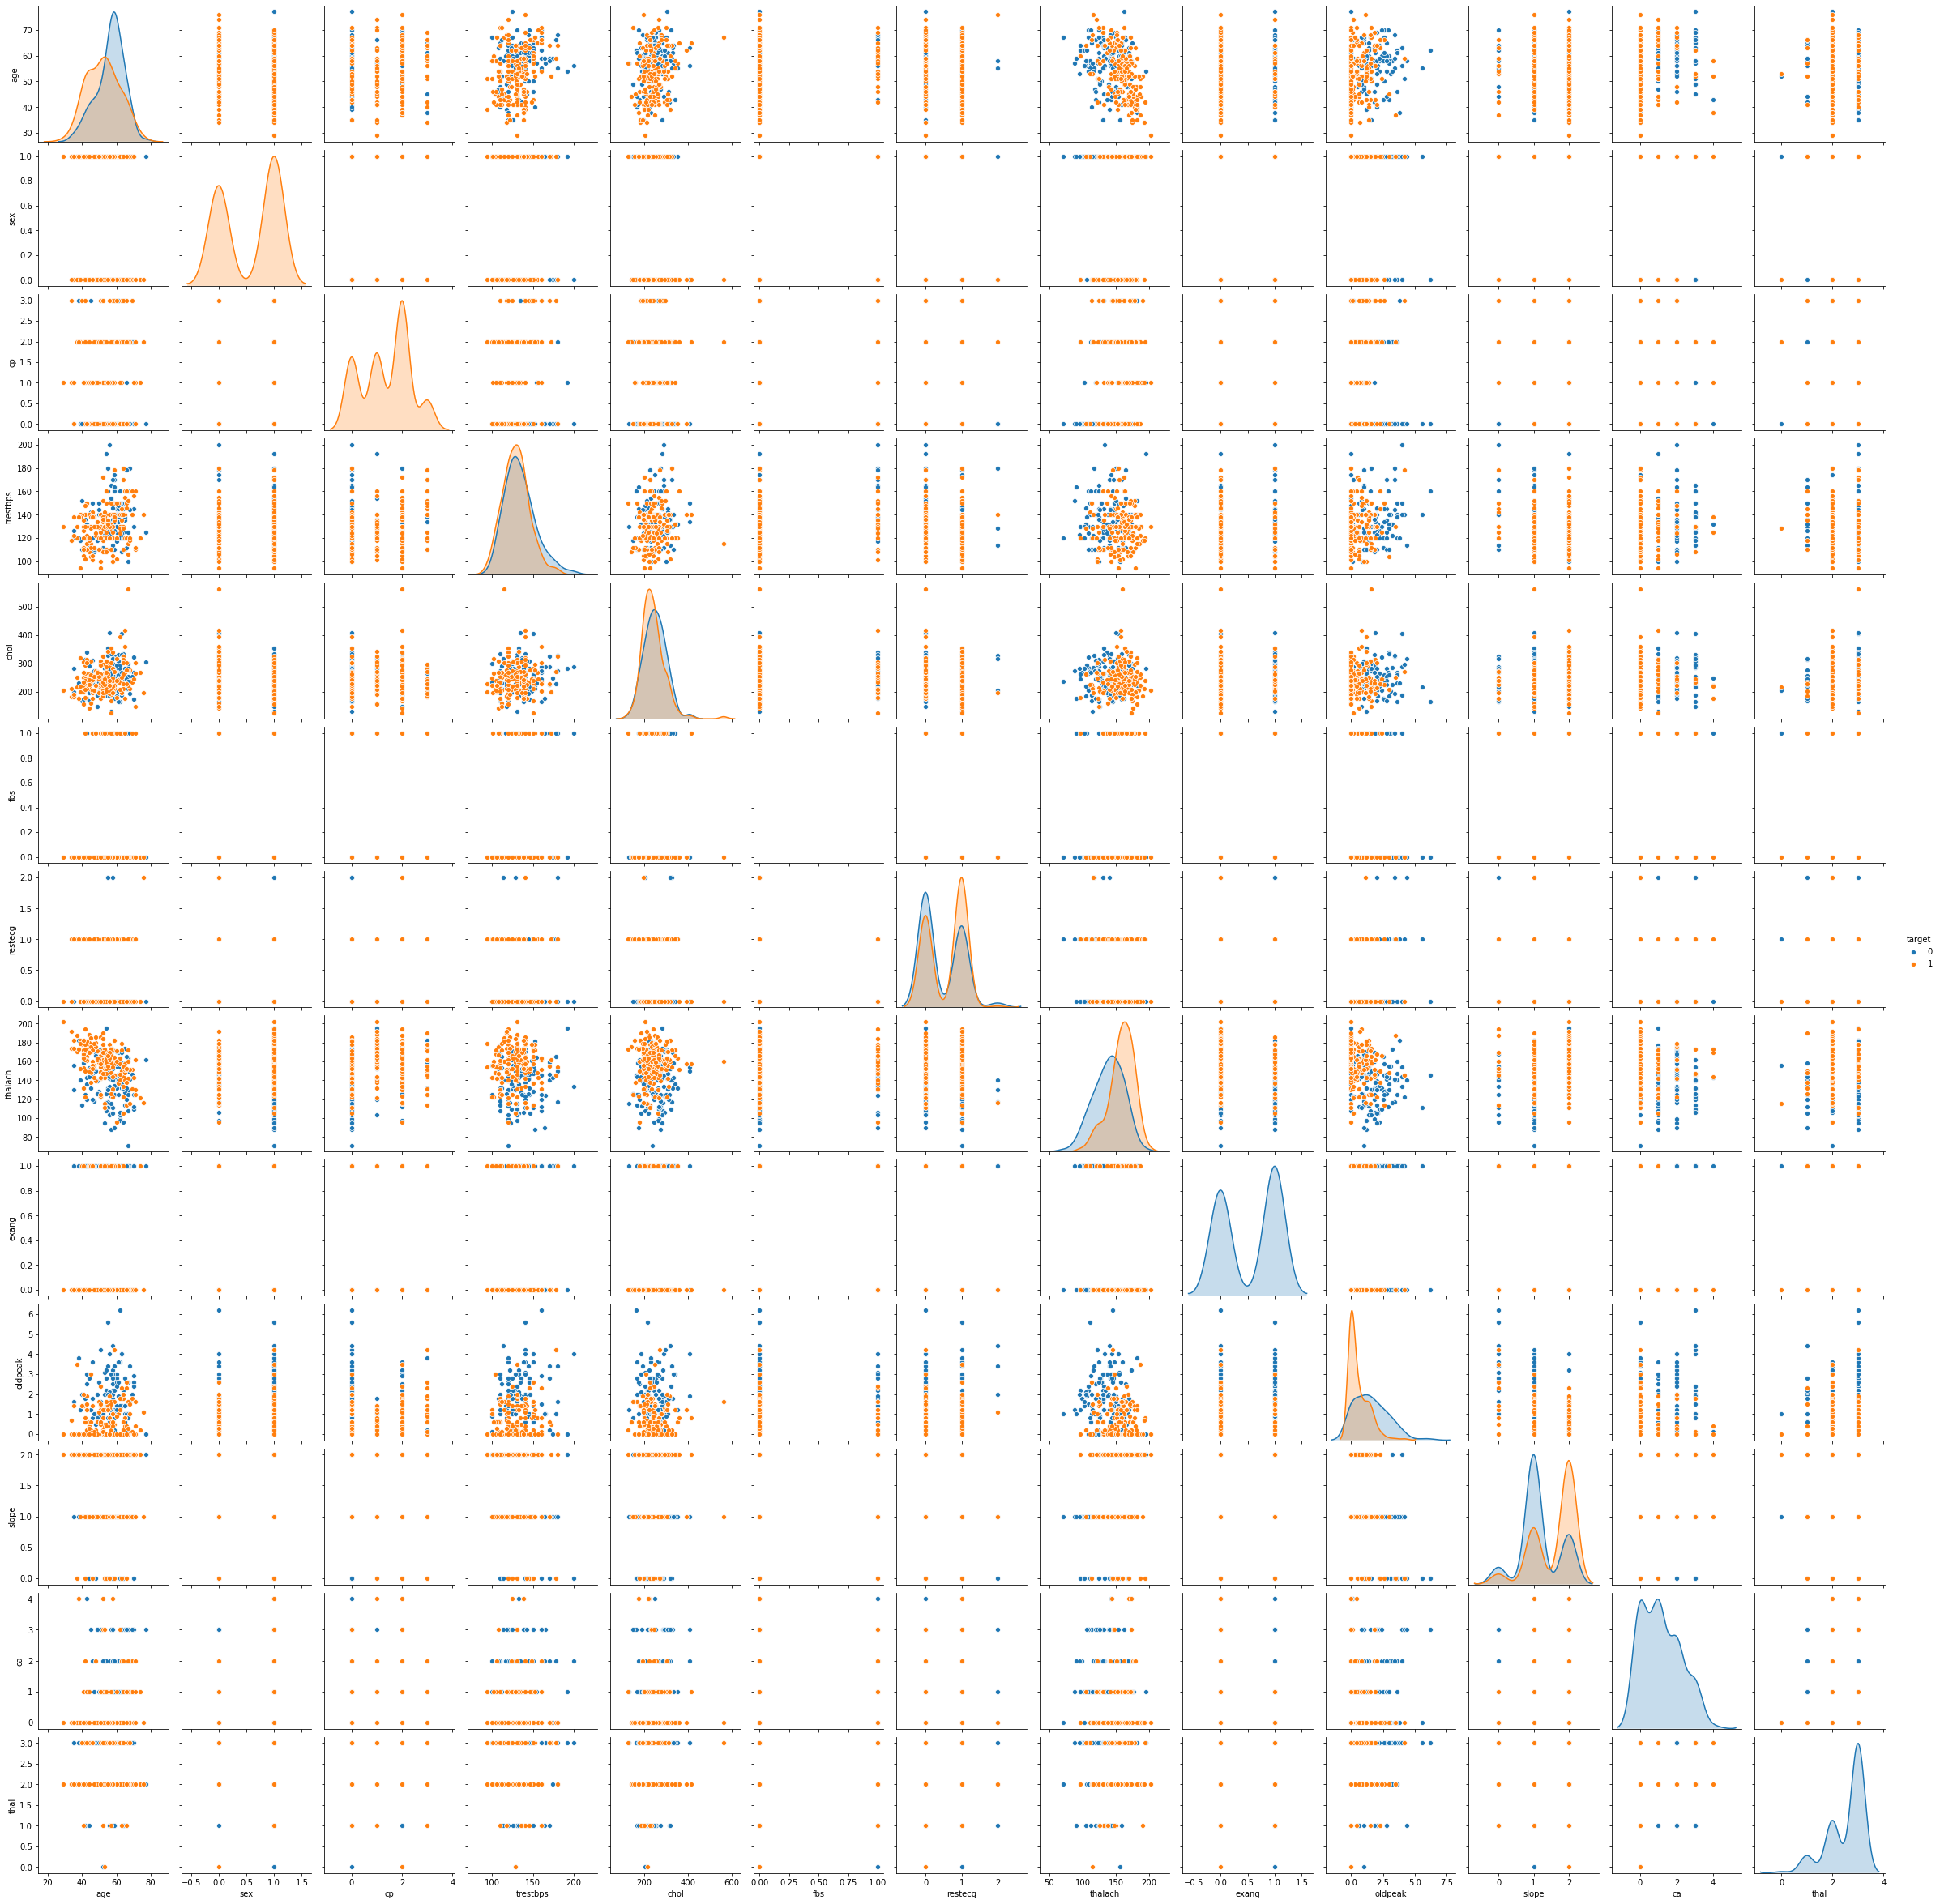

In [17]:
#Visualize the data with pairplot
sns.pairplot(data,hue='target')

In [18]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
def plot_data(variable,data):
    d=sns.distplot(data[variable],bins=30)
    d.set_title(variable)
    plt.show()
    return d

In [20]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

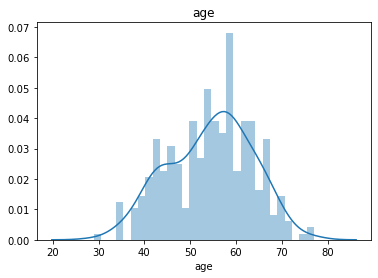

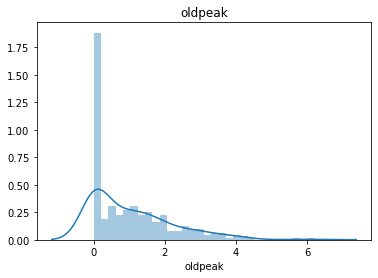

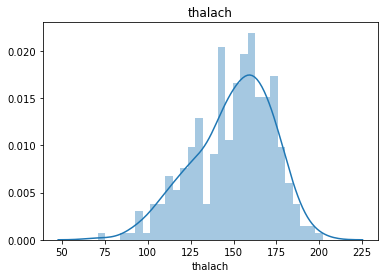

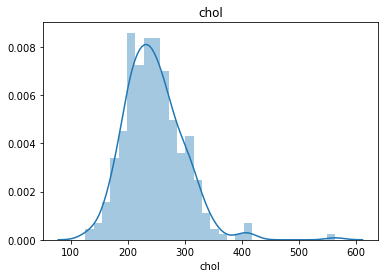

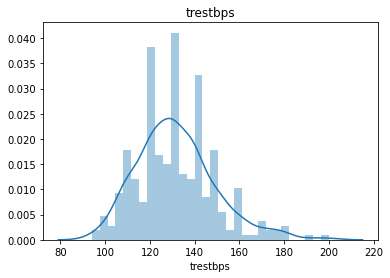

In [21]:
plt_data=['age','oldpeak','thalach','chol','trestbps']

for i in plt_data:
    plot_data(i,data)

In [22]:
def plot_data1(variable,data):
    g=sns.countplot(x=variable,data=data)
    g.set_title(variable)
    plt.show()
    return g

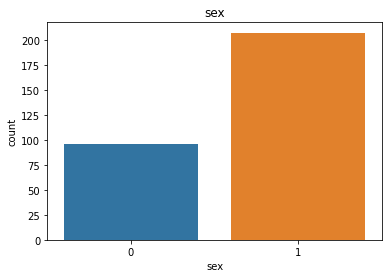

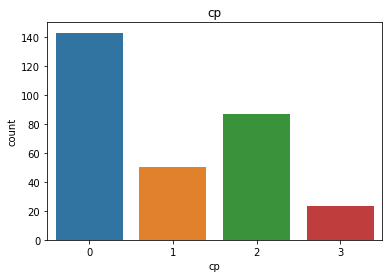

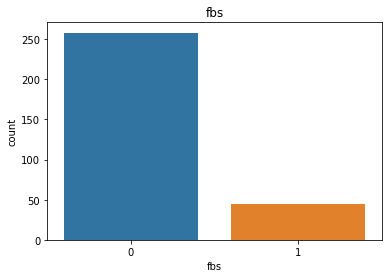

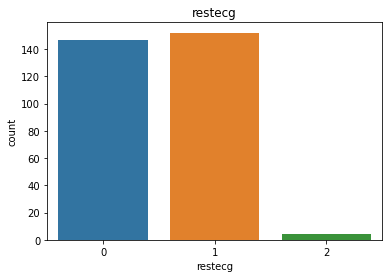

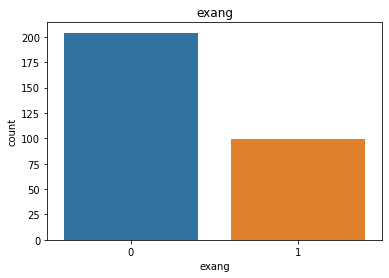

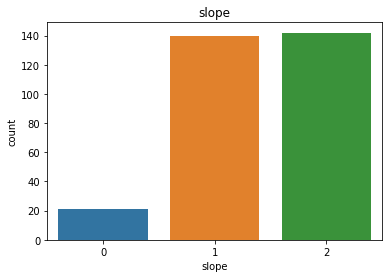

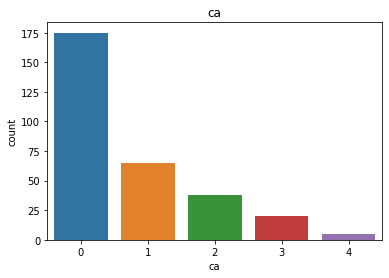

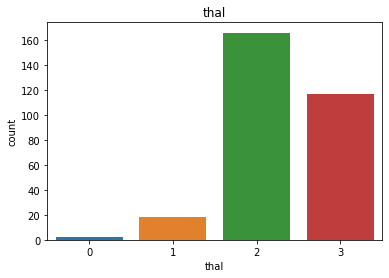

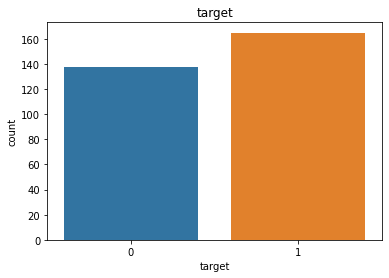

In [23]:
plt_d2=['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
for i in plt_d2:
    plot_data1(i,data)

In [24]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


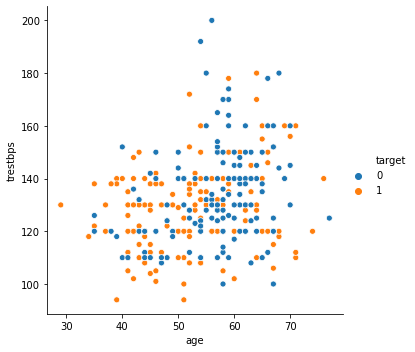

In [25]:
#check the relation with 'rel plot'
sns.relplot(x='age',y='trestbps',hue='target',data=data)

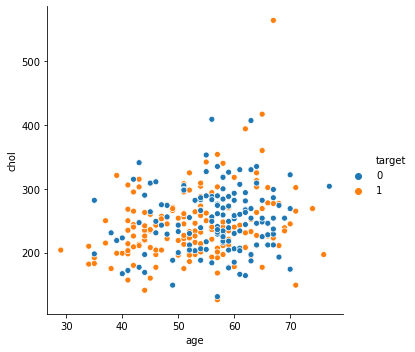

In [26]:
sns.relplot(x='age',y='chol',hue='target',data=data)

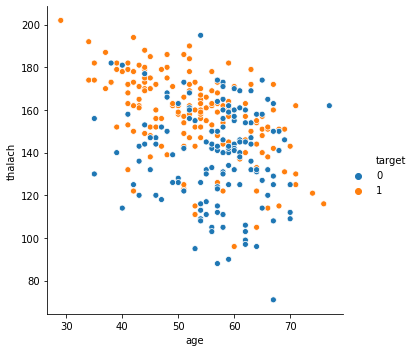

In [27]:
sns.relplot(x='age',y='thalach',hue='target',data=data)

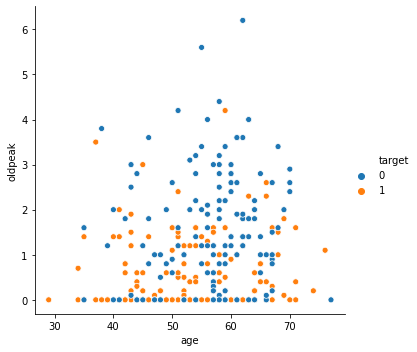

In [28]:
sns.relplot(x='age',y='oldpeak',hue='target',data=data)

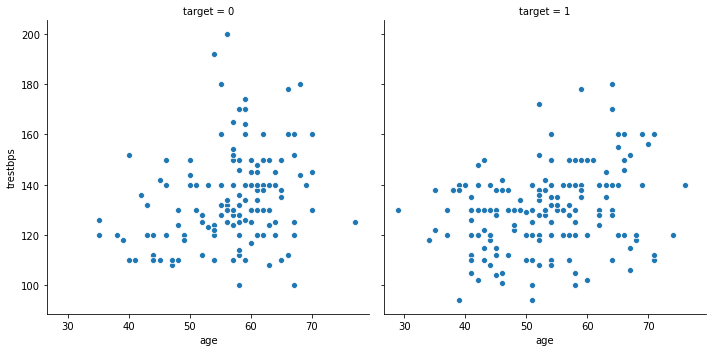

In [29]:
sns.relplot(x='age',y='trestbps',col='target',data=data)
plt.show()

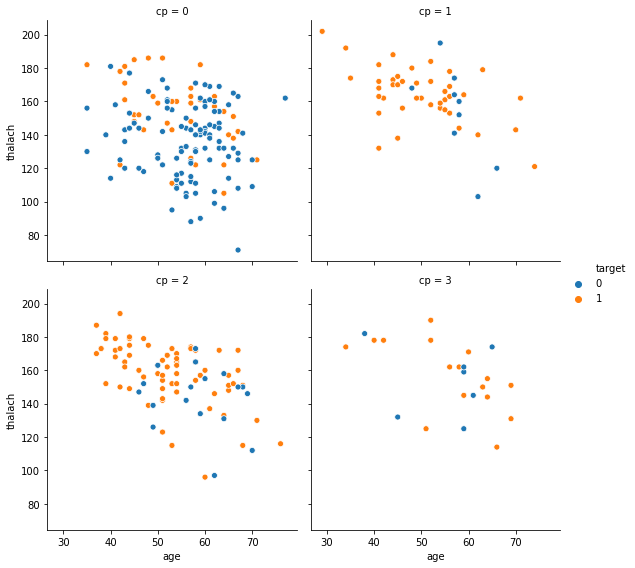

In [30]:
sns.relplot(x='age',y='thalach',data=data,hue='target',col='cp',col_wrap=2,height=4)

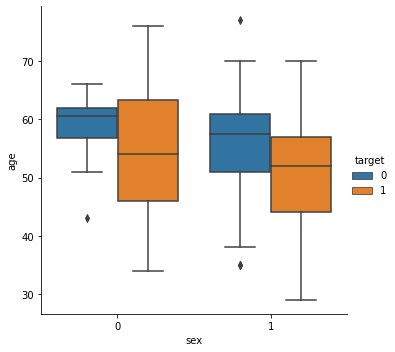

In [32]:
sns.catplot(x='sex',y='age',kind='box',data=data,hue='target')

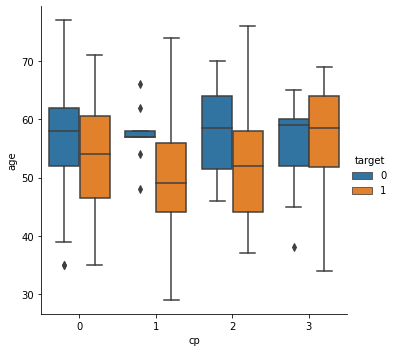

In [33]:
sns.catplot(x='cp',y='age',hue='target',data=data,kind='box')

In [38]:
#split the data in to 'x' and 'y'
x=data.iloc[:,:-1]
y=data['target']

In [39]:
#Get the shapes
print(x.shape,y.shape)

(303, 13) (303,)


In [40]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [41]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Feature selection

In [42]:
#Feature selection by extra tree regressor
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x,y)

ExtraTreesRegressor()

In [43]:
extra.feature_importances_

array([0.06251579, 0.03592462, 0.19284932, 0.04773182, 0.05138998,
       0.01696441, 0.0361348 , 0.06063482, 0.09792501, 0.07134588,
       0.05562937, 0.14635607, 0.12459811])

In [54]:
extra_feat=pd.DataFrame(extra.feature_importances_,index=x.columns,columns=['Value'])

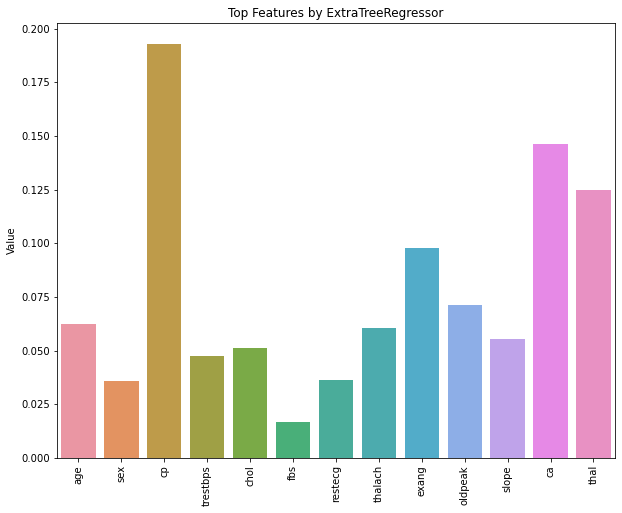

In [64]:
plt.figure(figsize=(10,8))
g=sns.barplot(x=extra_feat.index,y=extra_feat['Value'])
g.set_title('Top Features by ExtraTreeRegressor')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

In [65]:
#Feature importance by chi2 method
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

select=SelectKBest(score_func=chi2,k=8)
select.fit(x,y)

SelectKBest(k=8, score_func=<function chi2 at 0x000001B8E7B99B80>)

In [66]:
select.scores_

array([ 23.28662399,   7.57683451,  62.59809791,  14.8239245 ,
        23.93639448,   0.20293368,   2.97827075, 188.32047169,
        38.91437697,  72.64425301,   9.8040952 ,  66.44076512,
         5.79185297])

In [68]:
best_select=pd.DataFrame(select.scores_,index=x.columns,columns=['Score'])

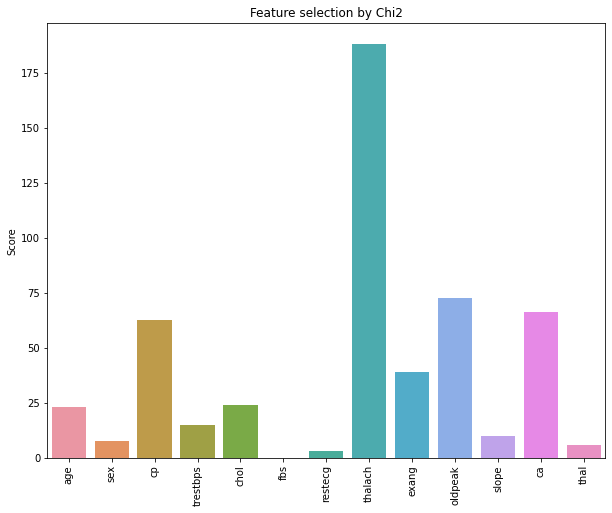

In [70]:
plt.figure(figsize=(10,8))
g=sns.barplot(x=best_select.index,y=best_select['Score'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Feature selection by Chi2')
plt.show()

age ----> 0.038006146
sex ----> 0.05182141
cp ----> 0.2290901
trestbps ----> 0.02941631
chol ----> 0.026636712
fbs ----> 0.03401838
restecg ----> 0.029869102
thalach ----> 0.029621908
exang ----> 0.08811522
oldpeak ----> 0.06589864
slope ----> 0.059119377
ca ----> 0.13829373
thal ----> 0.18009298


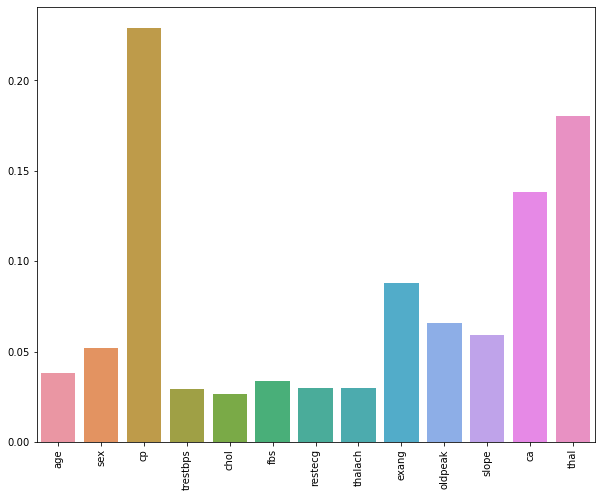

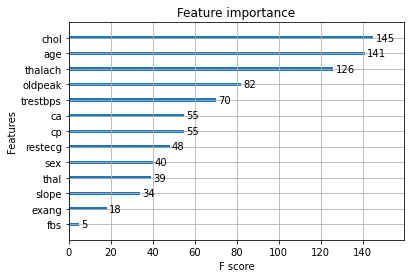

In [79]:
#Feature selection by xgboost
import xgboost
from xgboost import plot_importance
xgb=xgboost.XGBClassifier()
xgb.fit(x,y)
features=xgb.feature_importances_
columns=list(x.columns)
for i,j in enumerate(features):
    print(columns[i],"---->",j)
plt.figure(figsize=(10,8))
g=sns.barplot([x for x in range(len(features))],features)
g.set_xticklabels(x.columns,rotation=90)
plot_importance(xgb)

age ---> 0.08725304614307444
sex ---> 0.03495905000990883
cp ---> 0.14213558001842297
trestbps ---> 0.07421363447270993
chol ---> 0.08015809077693804
fbs ---> 0.009768387537908828
restecg ---> 0.019413528194549678
thalach ---> 0.1179156069435747
exang ---> 0.040117196403359257
oldpeak ---> 0.12025762232258982
slope ---> 0.051626886380203595
ca ---> 0.1279393182066661
thal ---> 0.0942420525900938


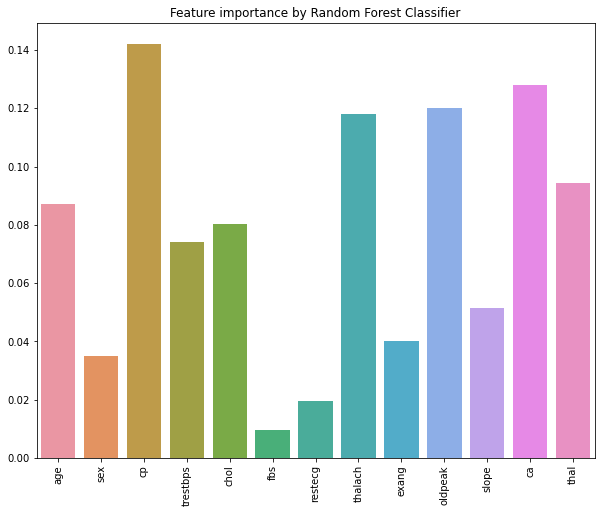

In [82]:
#Feature importance by RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()
rand.fit(x,y)
features=rand.feature_importances_
columns=list(x.columns)
for i,j in enumerate(features):
    print(columns[i],"--->",j)
plt.figure(figsize=(10,8))
g=sns.barplot([x for x in range (len(features))],features)
g.set_xticklabels(x.columns,rotation=90)
g.set_title('Feature importance by Random Forest Classifier')
plt.show()

age ---> 0.063940416987583
sex ---> 0.029104130611262425
cp ---> 0.27026320517427244
trestbps ---> 0.0597190001448488
chol ---> 0.11310234671916236
fbs ---> 0.0
restecg ---> 0.018629776021080364
thalach ---> 0.046653638561826645
exang ---> 0.020427385988026705
oldpeak ---> 0.09975351247735041
slope ---> 0.026202082941213383
ca ---> 0.13947726961095938
thal ---> 0.11272723476241397


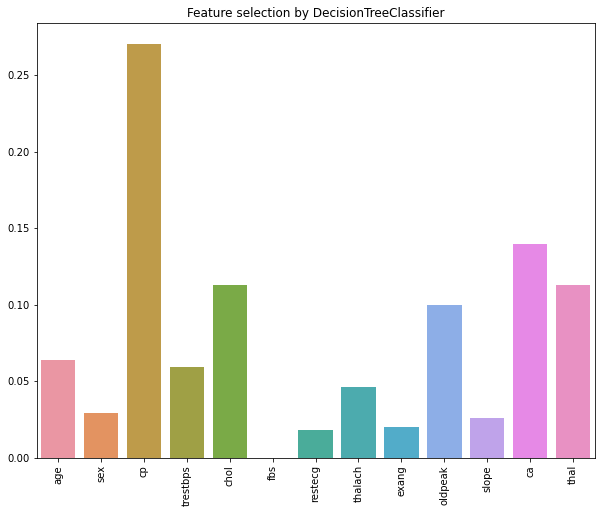

In [84]:
#Feature Importance by DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x,y)
columns=list(x.columns)
features=dt.feature_importances_
for i,j in enumerate(features):
    print(columns[i],"--->",j)
plt.figure(figsize=(10,8))
g=sns.barplot([x for x in range (len(features))],features)
g.set_xticklabels(x.columns,rotation=90)
g.set_title('Feature selection by DecisionTreeClassifier')
plt.show()

from the above feature selection method we can observe that the columns such as 'fbs','restecg' are not much give high importance, so let's drop for sometime

In [86]:
x=x.drop(labels=['fbs','restecg'],axis=1)
x.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,150,0,2.3,0,0,1
1,37,1,2,130,250,187,0,3.5,0,0,2
2,41,0,1,130,204,172,0,1.4,2,0,2
3,56,1,1,120,236,178,0,0.8,2,0,2
4,57,0,0,120,354,163,1,0.6,2,0,2


In [87]:
#split the data in to 'train_test_split'
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Feature transformation

In [88]:
#lets take down the all values in the dataset in to same vectors
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [95]:
print("X_train:{}".format(x_train.shape),
      "y_train:{}".format(y_train.shape),
      "X_test:{}".format(x_test.shape),
      "y_test:{}".format(y_test.shape))

X_train:(242, 11) y_train:(242,) X_test:(61, 11) y_test:(61,)


### Model building

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import ShuffleSplit,cross_val_score,KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.simplefilter('ignore')

In [114]:
#Create a function for selecting a best model for the problem
def select_model(x,y):
    models={"Logistic Regression":
            {'model':LogisticRegression(solver='lbfgs',multi_class='auto'),"parameters":{'C':[2,5,7,8,9,10]}},
           "DecisionTreeClassifier":
            {'model':DecisionTreeClassifier(splitter='best'),"parameters":{'criterion':['gini','entrophy'],'max_depth':[2,5,7,8,10]}},
           "SVM":
            {"model":SVC(gamma='auto'),"parameters":{'kernel':['rbf','linear','poly'],'C':[0.1,0.3,1,3,5,7]}},
           "KnearestNeighbors":
            {"model":KNeighborsClassifier(metric='minkowski',weights='uniform',algorithm='auto'),"parameters":{"n_neighbors":[4,6,8,9,10]}},
           "RandomForestClassifier":
            {"model":RandomForestClassifier(),"parameters":{'n_estimators':[10,20,40,60,80,100,200],'criterion':['gini','entrophy']}}
            }
    scores=[]
    cv_shuffle=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
    
    for model_name,model_param in models.items():
        gs=GridSearchCV(model_param['model'],model_param['parameters'],cv=cv_shuffle,return_train_score=False)
        gs.fit(x,y)
        scores.append({'model':model_name,'Best_parameters':gs.best_params_,'Best_score':gs.best_score_})
        
    return pd.DataFrame(scores,columns=['model','Best_parameters','Best_score'])

In [115]:
select_model(x_train,y_train)

,model,Best_parameters,Best_score
0,Logistic Regression,{'C': 2},0.816327
1,DecisionTreeClassifier,"{'criterion': 'gini', 'max_depth': 2}",0.751020
2,SVM,"{'C': 0.1, 'kernel': 'linear'}",0.836735
3,KnearestNeighbors,{'n_neighbors': 9},0.838776
4,RandomForestClassifier,"{'criterion': 'gini', 'n_estimators': 80}",0.818367


In [121]:
cv=cross_val_score(RandomForestClassifier(criterion='gini',n_estimators=80,random_state=0),x_train,y_train,cv=5)
cv

array([0.7755102 , 0.79591837, 0.83333333, 0.85416667, 0.85416667])

In [122]:
cv.mean()

0.8226190476190476

In [124]:
classifier=RandomForestClassifier(n_estimators=80,random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=80, random_state=0)

In [125]:
y_pred=classifier.predict(x_test)
y_pred[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [127]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

0.8360655737704918
[[22  5]
 [ 5 29]]


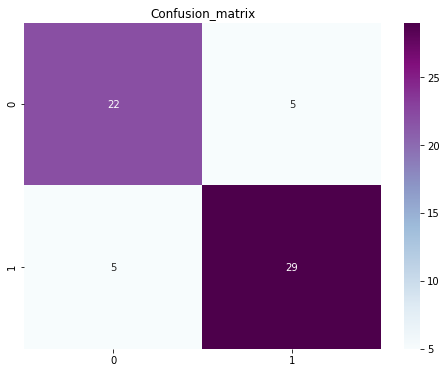

In [130]:
plt.figure(figsize=(8,6))
fg=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='BuPu')
fg.set_title('Confusion_matrix')
plt.show()